Note: O1-O3 data is coming from the GWTC1 - GWTC3 catalogs. O4 data is being pulled off of GraceDB (O3 can also be pulled off of GDB but we will use GWTC3 data instead since it contains luminosity distances.) 

In [35]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [36]:
#O1_all = pd.read_csv("../Data/GWTC-1.csv")
O1_all = pd.read_csv("../Data/GWTC-1-confident.csv")
O2_all = pd.read_csv("../Data/GWTC-2.csv")
#O3_all = pd.read_csv("../Data/GWTC-3.csv")
O3_all = pd.read_csv("../Data/GWTC-3-confident.csv")
O4_all = pd.read_csv("../Data/real_events_O4_ALL.csv")

In [37]:
print(len(O1_all), " events in O1")
print(len(O2_all), " events in O2")
print(len(O3_all), " events in O3")
print(len(O4_all), " events in O4 ... so far ...")

11  events in O1
39  events in O2
35  events in O3
53  events in O4 ... so far ...


In [38]:
O1_all.columns

Index(['name', 'total_mass_source_upper', 'redshift_upper', 'p_astro_lower',
       'chirp_mass_source_upper', 'mass_1_source_upper', 'commonName',
       'chi_eff_upper', 'far_lower', 'catalog.shortName', 'far_upper',
       'total_mass_source_lower', 'network_matched_filter_snr_lower',
       'mass_1_source_lower', 'reference', 'version', 'jsonurl',
       'final_mass_source_lower', 'redshift', 'final_mass_source',
       'chirp_mass', 'total_mass_source', 'mass_1_source', 'GPS',
       'chi_eff_lower', 'network_matched_filter_snr', 'far',
       'final_mass_source_upper', 'mass_2_source', 'p_astro_upper',
       'luminosity_distance', 'chirp_mass_lower', 'chirp_mass_upper',
       'network_matched_filter_snr_upper', 'luminosity_distance_upper',
       'chirp_mass_source_lower', 'redshift_lower', 'mass_2_source_upper',
       'luminosity_distance_lower', 'mass_2_source_lower', 'chirp_mass_source',
       'p_astro', 'chi_eff'],
      dtype='object')

Defintion of chirp mass (GWTC1_confident and GWTC3_confident don't have it)
$$\mathscr{M} = \frac{(m_1 m_2)^{3/5}}{(m_1 + m_2)^{1/5}}$$

In [39]:
#def chirp_mass(mass_1, mass_2):
#    chirp_mass = (mass_1 * mass_2)**(3/5)/(mass_1 + mass_2)**(1/5)
#    return chirp_mass

dfs = [O1_all, O3_all]
for row in dfs:
    chirp_mass = (row["mass_1_source"] * row["mass_2_source"])**(3/5)/(row["mass_1_source"] + row["mass_2_source"])**(1/5)
    row["chirp_mass"] = chirp_mass

In [40]:
# list of possible mpl colors given here: https://matplotlib.org/stable/gallery/color/named_colors.html

# list of possible mpl markers : https://matplotlib.org/stable/api/markers_api.html

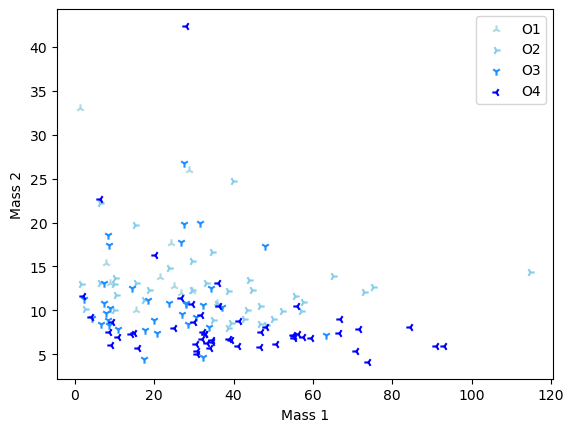

In [41]:
plt.scatter(O1_all["chirp_mass"], O1_all["network_matched_filter_snr"], color = "lightblue", label = "O1", marker = "2")
plt.scatter(O2_all["chirp_mass"], O2_all["network_matched_filter_snr"], color = "skyblue", label = "O2", marker = "4")
plt.scatter(O3_all["chirp_mass"], O3_all["network_matched_filter_snr"], color = "dodgerblue", label = "O3", marker = "1")
plt.scatter(O4_all["chirp_mass"], O4_all["snr"], color = "blue", label = "O4", marker = "3")
plt.xlabel("Mass 1")
plt.ylabel("Mass 2")
plt.legend()

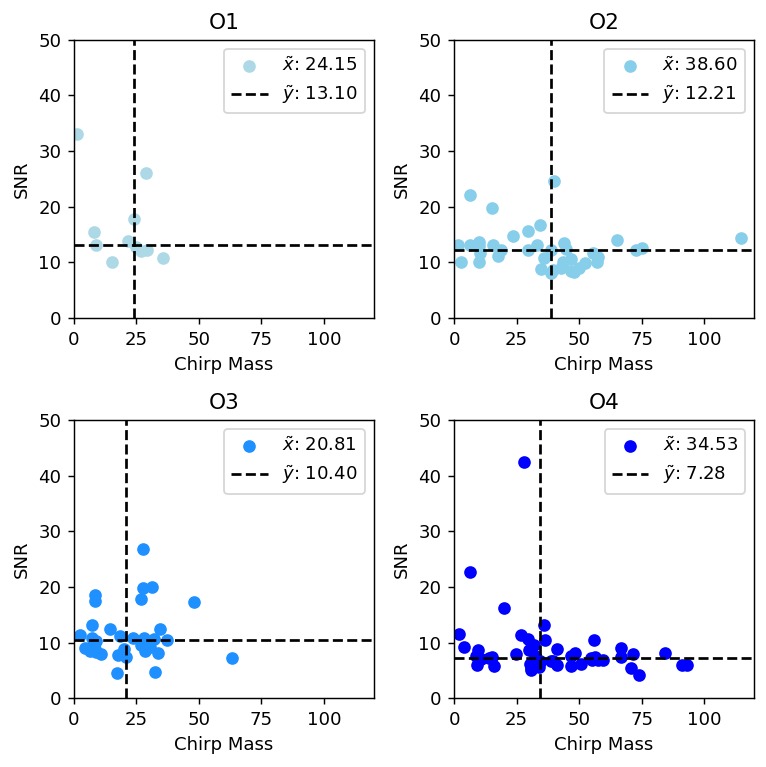

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6), dpi = 130)

# Scatter plot code with labels
ax[0, 0].scatter(O1_all["chirp_mass"], O1_all["network_matched_filter_snr"], color="lightblue", label="O1")
ax[0, 1].scatter(O2_all["chirp_mass"], O2_all["network_matched_filter_snr"], color="skyblue", label="O2")
ax[1, 0].scatter(O3_all["chirp_mass"], O3_all["network_matched_filter_snr"], color="dodgerblue", label="O3")
ax[1, 1].scatter(O4_all["chirp_mass"], O4_all["snr"], color="blue", label="O4")

# Calculate median chirp mass for each dataset
median_chirp_mass_O1 = np.median(O1_all["chirp_mass"])
median_chirp_mass_O2 = np.median(O2_all["chirp_mass"])
median_chirp_mass_O3 = np.median(O3_all["chirp_mass"])
median_chirp_mass_O4 = np.median(O4_all["chirp_mass"])

# Add vertical black lines representing the median chirp mass
ax[0, 0].axvline(median_chirp_mass_O1, color="black", linestyle="--")
ax[0, 1].axvline(median_chirp_mass_O2, color="black", linestyle="--")
ax[1, 0].axvline(median_chirp_mass_O3, color="black", linestyle="--")
ax[1, 1].axvline(median_chirp_mass_O4, color="black", linestyle="--")

# Calculate median SNR for each dataset
median_snr_O1 = np.median(O1_all["network_matched_filter_snr"])
median_snr_O2 = np.median(O2_all["network_matched_filter_snr"])
median_snr_O3 = np.median(O3_all["network_matched_filter_snr"])
median_snr_O4 = np.median(O4_all["snr"])

# Add horizontal black lines representing the median SNR
ax[0, 0].axhline(median_snr_O1, color="black", linestyle="--")
ax[0, 1].axhline(median_snr_O2, color="black", linestyle="--")
ax[1, 0].axhline(median_snr_O3, color="black", linestyle="--")
ax[1, 1].axhline(median_snr_O4, color="black", linestyle="--")

# Add legends to each subplot with LaTeX expression for median and actual values
ax[0, 0].legend([f'$\\tilde{{x}}$: {median_chirp_mass_O1:.2f}', f'$\\tilde{{y}}$: {median_snr_O1:.2f}'])
ax[0, 1].legend([f'$\\tilde{{x}}$: {median_chirp_mass_O2:.2f}', f'$\\tilde{{y}}$: {median_snr_O2:.2f}'])
ax[1, 0].legend([f'$\\tilde{{x}}$: {median_chirp_mass_O3:.2f}', f'$\\tilde{{y}}$: {median_snr_O3:.2f}'])
ax[1, 1].legend([f'$\\tilde{{x}}$: {median_chirp_mass_O4:.2f}', f'$\\tilde{{y}}$: {median_snr_O4:.2f}'])

common_xlimits = (0, 120) 
common_ylimits = (0, 50) 

for row in ax:
    for subplot in row:
        subplot.set_xlim(common_xlimits)
        subplot.set_ylim(common_ylimits)


ax[0, 0].set_xlabel("Chirp Mass")
ax[0, 0].set_ylabel("SNR")

ax[0, 1].set_xlabel("Chirp Mass")
ax[0, 1].set_ylabel("SNR")

ax[1, 0].set_xlabel("Chirp Mass")
ax[1, 0].set_ylabel("SNR")

ax[1, 1].set_xlabel("Chirp Mass")
ax[1, 1].set_ylabel("SNR")

ax[0, 0].set_title("O1")
ax[0, 1].set_title("O2")
ax[1, 0].set_title("O3")
ax[1, 1].set_title("O4")

plt.tight_layout()

In [43]:
# changing the name of the snr column in the O4 data so that the loop can be constructed
O4_all["network_matched_filter_snr"] = O4_all["snr"]

O4_all["mass_1_source"] = O4_all["mass1"]
O4_all["mass_2_source"] = O4_all["mass2"]

O4_all["far"] = O4_all["combined_far"]

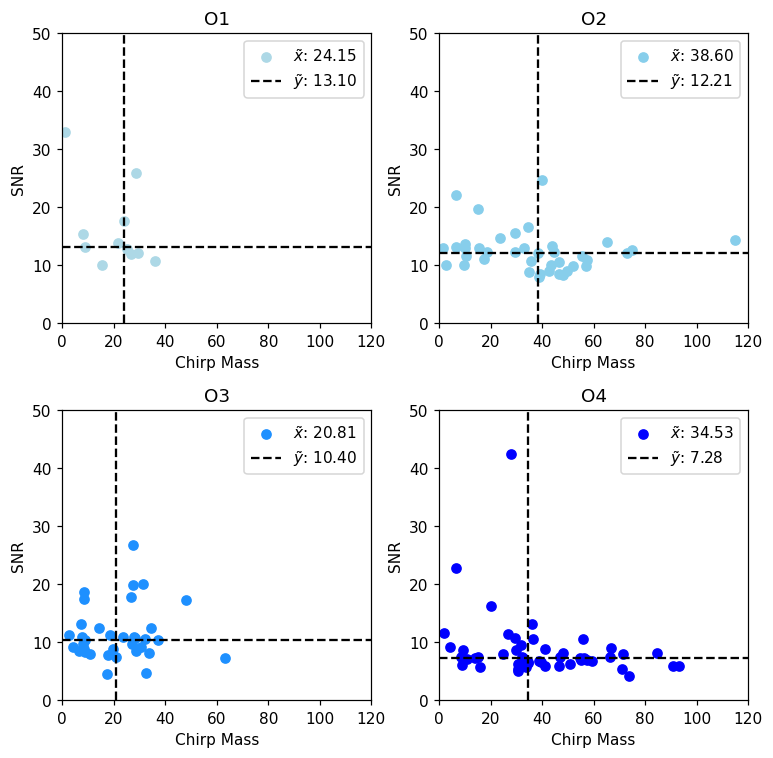

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7), dpi=110)

datasets = [O1_all, O2_all, O3_all, O4_all]

dataset_labels = ["O1", "O2", "O3", "O4"]

colors = ["lightblue", "skyblue", "dodgerblue", "blue"]

left_index = [0,0,1,1]
right_index = [0,1,0,1]

for dataset, dataset_label, color, li, ri in zip(datasets, dataset_labels, colors, left_index, right_index):

    ax[li, ri].scatter(dataset["chirp_mass"], dataset["network_matched_filter_snr"], color=color, label=dataset_label)

    median_chirp_mass = np.median(dataset["chirp_mass"])
    median_snr = np.median(dataset["network_matched_filter_snr"])

    ax[li, ri].axvline(median_chirp_mass, color="black", linestyle="--")
    ax[li, ri].axhline(median_snr, color="black", linestyle="--")

    ax[li, ri].legend([f'$\\tilde{{x}}$: {median_chirp_mass:.2f}', f'$\\tilde{{y}}$: {median_snr:.2f}'])

    ax[li, ri].set_xlim(0, 120)
    ax[li, ri].set_ylim(0, 50)

    ax[li, ri].set_xlabel("Chirp Mass")
    ax[li, ri].set_ylabel("SNR")

    ax[li, ri].set_title(dataset_label)

plt.tight_layout()

plt.show()


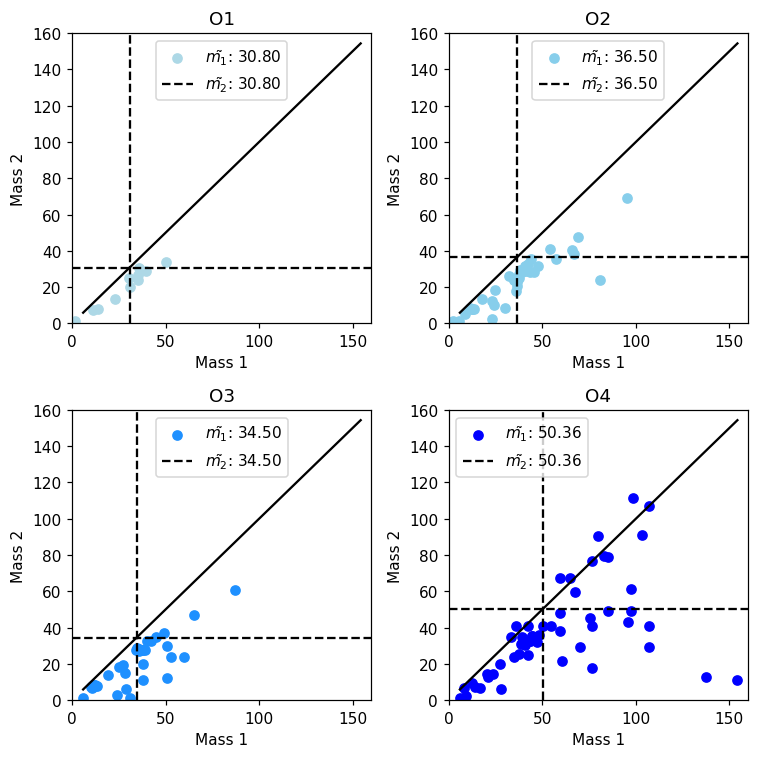

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7), dpi=110)

datasets = [O1_all, O2_all, O3_all, O4_all]

dataset_labels = ["O1", "O2", "O3", "O4"]

colors = ["lightblue", "skyblue", "dodgerblue", "blue"]

left_index = [0,0,1,1]
right_index = [0,1,0,1]
x = np.linspace(min(O4_all["mass_1_source"]), max(O4_all["mass_1_source"]), 100)
for dataset, dataset_label, color, li, ri in zip(datasets, dataset_labels, colors, left_index, right_index):

    ax[li, ri].scatter(dataset["mass_1_source"], dataset["mass_2_source"], color=color, label=dataset_label)

    median_chirp_mass = np.median(dataset["mass_1_source"])
    median_snr = np.median(dataset["mass_1_source"])

    ax[li, ri].axvline(median_chirp_mass, color="black", linestyle="--")
    ax[li, ri].axhline(median_snr, color="black", linestyle="--")

    ax[li,ri].plot(x,x, color = "black", label = "$\\{m_1} = \\{m_2}$")
    
    ax[li, ri].legend([f'$\\tilde{{m_1}}$: {median_chirp_mass:.2f}', f'$\\tilde{{m_2}}$: {median_snr:.2f}'])

    ax[li, ri].set_xlim(0, 160)
    ax[li, ri].set_ylim(0, 160)
    
    ax[li, ri].set_xlabel("Mass 1")
    ax[li, ri].set_ylabel("Mass 2")

    ax[li, ri].set_title(dataset_label)

plt.tight_layout()

plt.show()


$$\chi_{\text{eff}} = \frac{\vec{S_1}/m_1+\vec{S_2}/m_2}{m_1+m_2} \cdot \hat{L}$$

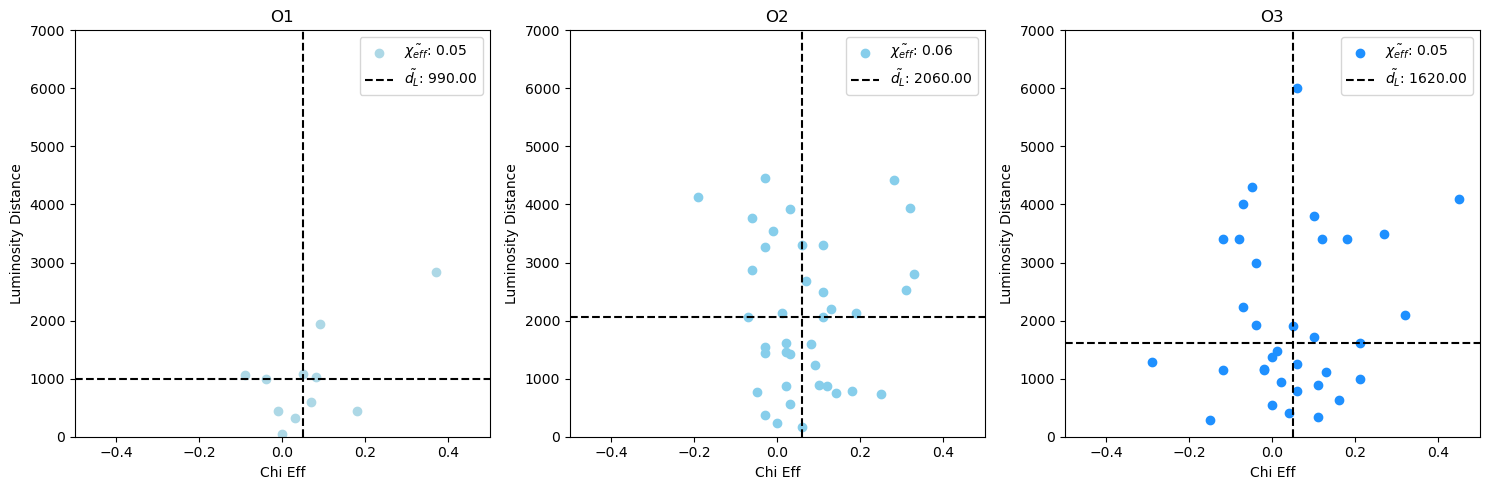

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

datasets = [O1_all, O2_all, O3_all]

dataset_labels = ["O1", "O2", "O3"]

colors = ["lightblue", "skyblue", "dodgerblue"]

right_index = [0,1,2]

for dataset, dataset_label, color, li, ri in zip(datasets, dataset_labels, colors, left_index, right_index):

    ax[ri].scatter(dataset["chi_eff"], dataset["luminosity_distance"], color=color, label=dataset_label)

    median_chi_eff = np.median(dataset["chi_eff"])
    median_luminosity_distance = np.median(dataset["luminosity_distance"])

    ax[ri].axvline(median_chi_eff, color="black", linestyle="--")
    ax[ri].axhline(median_luminosity_distance, color="black", linestyle="--")
    
    ax[ri].legend([f'$\\tilde{{\\chi_{{eff}}}}$: {median_chi_eff:.2f}', f'$\\tilde{{d_L}}$: {median_luminosity_distance:.2f}'])

    # remember that these limits were manually set
    ax[ri].set_xlim(-.5, .5)
    ax[ri].set_ylim(0, 7000)
    
    ax[ri].set_xlabel("Chi Eff")
    ax[ri].set_ylabel("Luminosity Distance")

    ax[ri].set_title(dataset_label)

plt.tight_layout()

plt.show()


### t-SNE plots for O1-O4: 

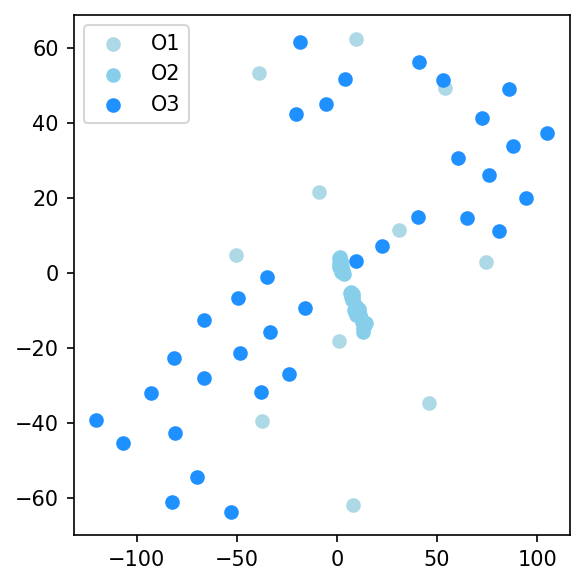

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=150)

datasets = [O1_all, O2_all, O3_all, O4_all]

dataset_labels = ["O1", "O2", "O3", "O4"]

colors = ["lightblue", "skyblue", "dodgerblue", "blue"]

variables = ["mass_1_source", "mass_2_source", "chirp_mass", "far"]

for dataset, dataset_label, color, li, ri in zip(datasets, dataset_labels, colors, left_index, right_index):


    tsne = TSNE(n_components=2, perplexity=10,random_state=42)

    X_tsne = tsne.fit_transform(dataset[variables])
    
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1],color = color, label= dataset_label)

ax.legend()

plt.tight_layout()

plt.show()

# notice that O4 isn't present right now. Must not have a parameter defined correctly. 

# Hiroki, would you look into this? What are the parameters that we can use across O1-O3 AND O4 
# Example: luminosity distance is defined in the O1-O3 data but NOT for O4. What are the parameters we can use for all data? 

For just O1-O3 (so I know they have the exact same parameter definitions):

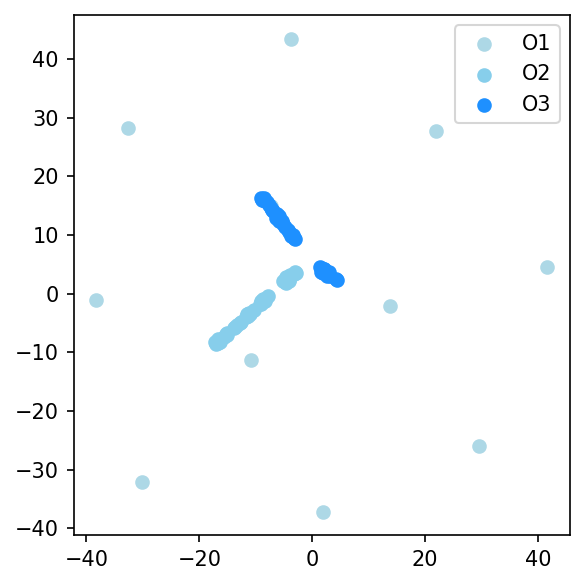

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=150)

datasets = [O1_all, O2_all, O3_all]

dataset_labels = ["O1", "O2", "O3"]

colors = ["lightblue", "skyblue", "dodgerblue"]

# NOTE: pastro contains NaNs. We should first make a check that all of the entries in a column do not contain NaNs. If they do, add code to remove that row of data and continue. 

variables = ["mass_1_source", "mass_2_source", "chirp_mass", "far", "chi_eff", "luminosity_distance", "redshift", "network_matched_filter_snr"]

for dataset, dataset_label, color, li, ri in zip(datasets, dataset_labels, colors, left_index, right_index):


    tsne = TSNE(n_components=2, perplexity=10,random_state=42)

    X_tsne = tsne.fit_transform(dataset[variables])
    
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1],color = color, label= dataset_label)

ax.legend()

plt.tight_layout()

plt.show()


## Quantifying some properties

Below is an example of using the Pearson correlation coefficent. 

The Pearson correlation coefficent is defined as:
$$\rho_{X,Y} = \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y}$$

Where $\sigma_X$, the standard deviation of $X$, is defined as: 
$$\sigma_X = \sqrt{\sum_{i=1}^{N}p_i(x_i-\mu_X)^2}$$
where $\mu$ is the mean of $X$ and $p_i$ is the probability of the $x_i$ state.

$\text{cov}(X,Y)$ is defined as:
$$\text{cov}(X,Y) = \frac{1}{n} \sum_{i=0}^N (x_i- \mu_X)(y_i-\mu_Y)$$

so the Pearson correlation coefficent is defined as: 

$$\rho_{X,Y} = \frac{\frac{1}{n} \sum_{i=0}^N (x_i- \mu_X)(y_i-\mu_Y)}{\sqrt{\sum_{i=1}^{N}p_i(x_i-\mu_X)^2}\sqrt{\sum_{i=1}^{N}p_i(y_i-\mu_Y)^2}}$$

I expect that the redshift of an event would be almost exactly linear with the luminosity distance so I expect a $\rho$ value for redshift and luminosity distance to be near 1. This use is just a test of the Pearson correlation coefficent. 

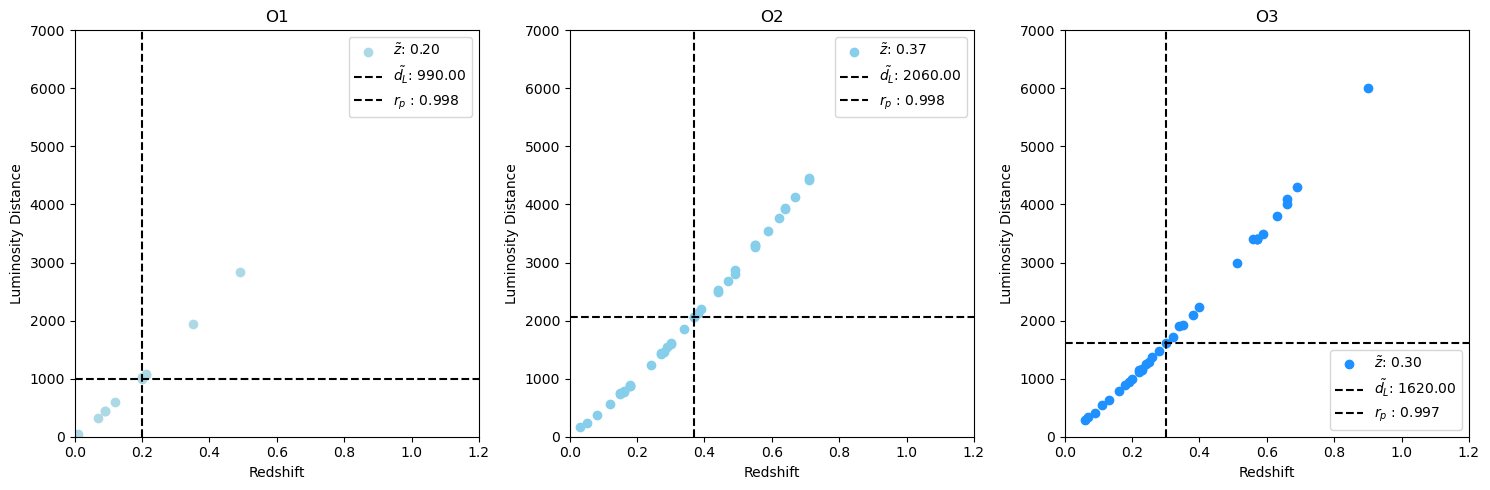

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

datasets = [O1_all, O2_all, O3_all]

dataset_labels = ["O1", "O2", "O3"]

colors = ["lightblue", "skyblue", "dodgerblue"]

right_index = [0,1,2]

for dataset, dataset_label, color, li, ri in zip(datasets, dataset_labels, colors, left_index, right_index):

    # PCC calculation: ---------------------------------------------------------------------- 

    z_mean = np.sum(dataset["redshift"])/len(dataset["redshift"])
    d_mean = np.sum(dataset["luminosity_distance"])/len(dataset["luminosity_distance"])

    z_std = np.sqrt(np.sum((dataset["redshift"] - z_mean)**2) / len(dataset))
    d_std = np.sqrt(np.sum((dataset["luminosity_distance"] - d_mean)**2) / len(dataset))


    cov = np.sum((dataset["redshift"] - z_mean) * (dataset["luminosity_distance"] - d_mean)) / len(dataset)

    pcc = cov/(z_std * d_std)

    # ----------------------------------------------------------------------------------------
    

    ax[ri].scatter(dataset["redshift"], dataset["luminosity_distance"], color=color, label=dataset_label)

    median_chi_eff = np.median(dataset["redshift"])
    median_luminosity_distance = np.median(dataset["luminosity_distance"])

    ax[ri].axvline(median_chi_eff, color="black", linestyle="--")
    ax[ri].axhline(median_luminosity_distance, color="black", linestyle="--")
    
    ax[ri].legend([f'$\\tilde{{z}}$: {median_chi_eff:.2f}', f'$\\tilde{{d_L}}$: {median_luminosity_distance:.2f}', f'$r_p$ : {pcc:.3f}'])

    # remember that these limits are manually set
    ax[ri].set_xlim(0, 1.2)
    ax[ri].set_ylim(0, 7000)
    
    ax[ri].set_xlabel("Redshift")
    ax[ri].set_ylabel("Luminosity Distance")

    ax[ri].set_title(dataset_label)

plt.tight_layout()

plt.show()


The Pearson correlation coefficent is sensitive to outliers it also doesn't capture montomoic behavior (where if one variables increases, the other does as well AND if one variable increases, the other decreases). To more accurately capture this behavoir and to protect against outliers, the Spearman rank correlation coefficient can be used. 

The Spearman rank correlation coefficient is defined as: 

$$r_s = \frac{\text{cov}(R(X),R(Y))}{\sigma_{R(X)}\sigma_{R(Y)}}$$

Where $R(X)$ denotes the rank in the X parameter, called a rank variable (see the code below), and $\sigma_{R(X)}$ represents its standard deviation. 

It should be noted that the problems of the PCC described above do not pertain to the plot comparing redshift and luminosity distances because there is almost an exact linear relationship and there are no significant outliers in the data. 

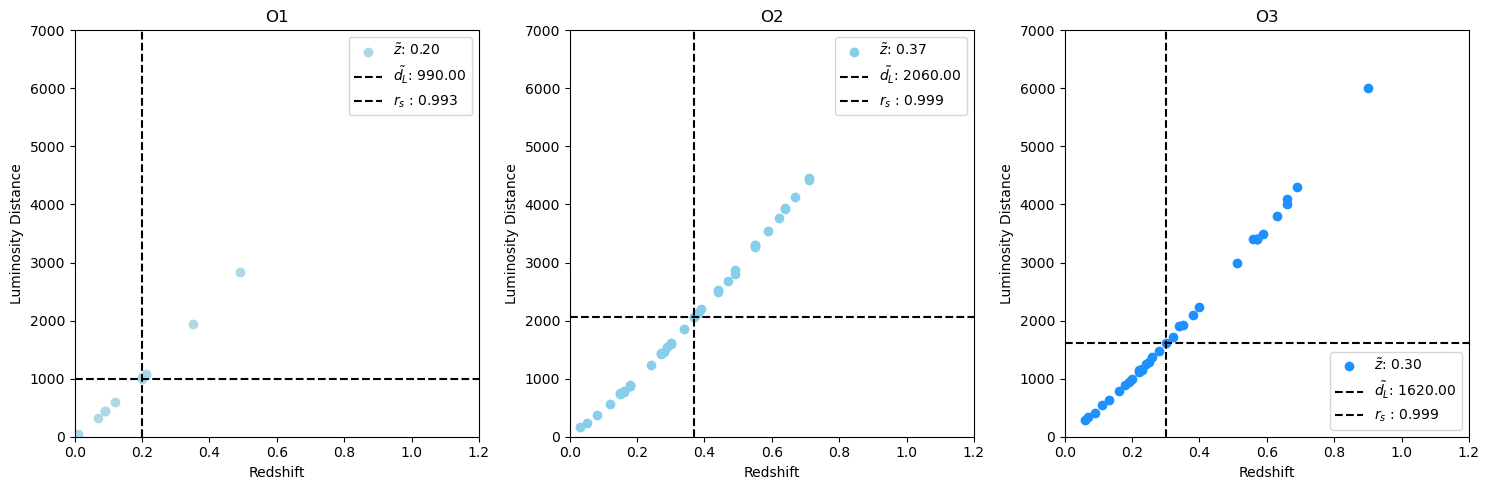

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

datasets = [O1_all, O2_all, O3_all]

dataset_labels = ["O1", "O2", "O3"]

colors = ["lightblue", "skyblue", "dodgerblue"]

right_index = [0,1,2]
for dataset, dataset_label, color, li, ri in zip(datasets, dataset_labels, colors, left_index, right_index):

    # SCC calculation: ---------------------------------------------------------------------- 

    # Using the pandas library's built-in function called .rank() to rank the data
    dataset['Rank_z'] = dataset['redshift'].rank()
    dataset['Rank_d'] = dataset['luminosity_distance'].rank()
    
    z_rank_mean = np.sum(dataset["Rank_z"])/len(dataset["Rank_z"])
    d_rank_mean = np.sum(dataset["Rank_d"])/len(dataset["Rank_d"])
    z_rank_std = np.sqrt(np.sum((dataset["Rank_z"] - z_rank_mean)**2) / len(dataset))
    d_rank_std = np.sqrt(np.sum((dataset["Rank_d"] - d_rank_mean)**2) / len(dataset))


    cov_rank = np.sum((dataset["Rank_z"] - z_rank_mean) * (dataset["Rank_d"] - d_rank_mean)) / len(dataset)

    scc = cov_rank/(z_rank_std * d_rank_std)

    # ----------------------------------------------------------------------------------------
    

    ax[ri].scatter(dataset["redshift"], dataset["luminosity_distance"], color=color, label=dataset_label)

    median_chi_eff = np.median(dataset["redshift"])
    median_luminosity_distance = np.median(dataset["luminosity_distance"])

    ax[ri].axvline(median_chi_eff, color="black", linestyle="--")
    ax[ri].axhline(median_luminosity_distance, color="black", linestyle="--")
    
    ax[ri].legend([f'$\\tilde{{z}}$: {median_chi_eff:.2f}', f'$\\tilde{{d_L}}$: {median_luminosity_distance:.2f}', f'$r_s$ : {scc:.3f}'])

    # remember that these limits are manually set
    ax[ri].set_xlim(0, 1.2)
    ax[ri].set_ylim(0, 7000)
    
    ax[ri].set_xlabel("Redshift")
    ax[ri].set_ylabel("Luminosity Distance")

    ax[ri].set_title(dataset_label)

plt.tight_layout()

plt.show()



Notice that there is almost no difference in the Spearman rank correlation coefficent values from those of the original Pearson correlation coefficient calculations. This was expected because the luminosity distance and redshift should be almost exactly linear (up to random error) and there are no significant outliers. 

Defining functions for the PCC and SCC since they may be useful later:

In [51]:
# The libraries required to be imported:
import pandas
import numpy as np

# Make sure to supply PCC with X and Y having quotations around them (so they may be accessed inside of PCC)
def PCC(dataset, X, Y):
    
    X_mean = np.sum(dataset[X])/len(dataset[X])
    Y_mean = np.sum(dataset[Y])/len(dataset[Y])

    X_std = np.sqrt(np.sum((dataset[X] - X_mean)**2) / len(dataset))
    Y_std = np.sqrt(np.sum((dataset[Y] - Y_mean)**2) / len(dataset))


    cov = np.sum((dataset[X] - X_mean) * (dataset[Y] - Y_mean)) / len(dataset)

    pcc = cov/(X_std * Y_std)
    
    return pcc

# Similarily for the Spearman correlation coefficient: 

def SCC(dataset, X, Y):
    
    dataset['Rank_X'] = dataset[X].rank()
    dataset['Rank_Y'] = dataset[Y].rank()
    
    X_rank_mean = np.sum(dataset["Rank_X"])/len(dataset["Rank_X"])
    Y_rank_mean = np.sum(dataset["Rank_Y"])/len(dataset["Rank_Y"])

    X_rank_std = np.sqrt(np.sum((dataset["Rank_X"] - X_rank_mean)**2) / len(dataset))
    Y_rank_std = np.sqrt(np.sum((dataset["Rank_Y"] - Y_rank_mean)**2) / len(dataset))


    cov_rank = np.sum((dataset["Rank_X"] - X_rank_mean) * (dataset["Rank_Y"] - Y_rank_mean)) / len(dataset)

    scc = cov_rank/(X_rank_std * Y_rank_std)

    return scc

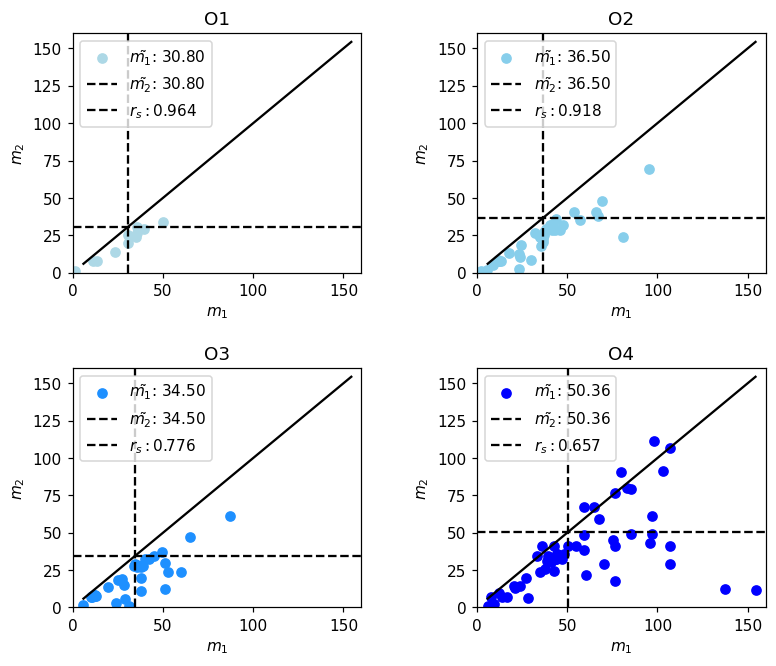

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(7, 6), dpi=110)

datasets = [O1_all, O2_all, O3_all, O4_all]

dataset_labels = ["O1", "O2", "O3", "O4"]

colors = ["lightblue", "skyblue", "dodgerblue", "blue"]

left_index = [0,0,1,1]
right_index = [0,1,0,1]
x = np.linspace(min(O4_all["mass_1_source"]), max(O4_all["mass_1_source"]), 100)
for dataset, dataset_label, color, li, ri in zip(datasets, dataset_labels, colors, left_index, right_index):

    ax[li, ri].scatter(dataset["mass_1_source"], dataset["mass_2_source"], color=color, label=dataset_label)

    median_chirp_mass = np.median(dataset["mass_1_source"])
    median_snr = np.median(dataset["mass_1_source"])

    r_val = SCC(dataset, "mass_1_source", "mass_2_source")
    
    ax[li, ri].axvline(median_chirp_mass, color="black", linestyle="--")
    ax[li, ri].axhline(median_snr, color="black", linestyle="--")

    ax[li,ri].plot(x,x, color = "black", label = "$\\{m_1} = \\{m_2}$")
    
    ax[li, ri].legend([f'$\\tilde{{m_1}}$: {median_chirp_mass:.2f}', f'$\\tilde{{m_2}}$: {median_snr:.2f}',  f'$r_s : {r_val:.3f}$'])

    ax[li, ri].set_xlim(0, 160)
    ax[li, ri].set_ylim(0, 160)
    
    ax[li, ri].set_xlabel("$m_1$")
    ax[li, ri].set_ylabel("$m_2$")

    ax[li, ri].set_title(dataset_label)

plt.tight_layout(pad=.5)
plt.subplots_adjust(wspace=.4, hspace=.4)

plt.show()

The above plot and the calculated SCC values show that LIGO has continued to detect more events that deviate from the mass1 = mass2 line as it as gotten more sensitive. Maybe this is reasonable? Maybe the events where mass1 = mass2 have higher SNR? 

How can I determine this? Can I calculate a distance between each point and the linear line and display the SNR ofthese events? My hypothesis is that when the distance from the mass1 = mass2 line is greater, the SNR will be smaller. I could then test this by making a similar scatter plot and looking for an inverse linear relationship.   

First consider a single dataset and compute the distances between a single scatter point and every point along the mass1=mass2 line. 

In [53]:
import pandas as pd
import numpy as np

x = np.linspace(min(O1_all["mass_1_source"]), max(O1_all["mass_1_source"]), 100)
y = np.linspace(min(O1_all["mass_2_source"]), max(O1_all["mass_2_source"]), 100)

distances = pd.DataFrame()

i = 0
while i < len(O1_all):
    
    row = O1_all.iloc[i]
    scatter_point = row[["mass_1_source", "mass_2_source"]].values
    
    distances[f"point_{i}"] = [
        abs(scatter_point[0] - line_val_x) + abs(scatter_point[1] - line_val_y)
        for line_val_x, line_val_y in zip(x, y)
    ]

    i += 1

distances
#for column in distances: 
#   min_dist = distances[f"point{i}"] 

,point_0,point_1,point_2,point_3,point_4,point_5,point_6,point_7,point_8,point_9,point_10
0,65.770000,59.370000,0.000000,53.070000,56.070000,81.470000,15.870000,48.070000,18.670000,34.070000,63.470000
1,64.947071,58.547071,0.822929,52.247071,55.247071,80.647071,15.047071,47.247071,17.847071,33.247071,62.647071
2,64.124141,57.724141,1.645859,51.424141,54.424141,79.824141,14.224141,46.424141,17.024141,32.424141,61.824141
3,63.301212,56.901212,2.468788,50.601212,53.601212,79.001212,13.401212,45.601212,16.201212,31.601212,61.001212
4,62.478283,56.078283,3.291717,49.778283,52.778283,78.178283,12.578283,44.778283,15.378283,30.778283,60.178283
...,...,...,...,...,...,...,...,...,...,...,...
95,12.408283,18.808283,78.178283,25.108283,22.108283,3.291717,62.308283,30.108283,59.508283,44.108283,14.708283
96,13.231212,19.631212,79.001212,25.931212,22.931212,2.468788,63.131212,30.931212,60.331212,44.931212,15.531212
97,14.054141,20.454141,79.824141,26.754141,23.754141,1.645859,63.954141,31.754141,61.154141,45.754141,16.354141
98,14.877071,21.277071,80.647071,27.577071,24.577071,0.822929,64.777071,32.577071,61.977071,46.577071,17.177071


In [54]:
x = np.linspace(min(O1_all["mass_1_source"]), max(O1_all["mass_1_source"]), 100)
y = np.linspace(min(O1_all["mass_2_source"]), max(O1_all["mass_2_source"]), 100)

distances_O1 = pd.DataFrame()
distances_O2 = pd.DataFrame()
distances_O3 = pd.DataFrame()
distances_O4 = pd.DataFrame()
df_list = [O1_all, O2_all, O3_all, O4_all]
distances_list = [distances_O1, distances_O2, distances_O3, distances_O4]
df_names = ["O1", "O2", "O3", "O4"]
for df, distances in zip(df_list, distances_list): 
    for row_index in range(len(df)):
        
        row = df.iloc[row_index]
        scatter_point = row[["mass_1_source", "mass_2_source"]].values
        
        for col_index, (line_val_x, line_val_y) in enumerate(zip(x, y)):
            value = abs(scatter_point[0] - line_val_x) + abs(scatter_point[1] - line_val_y)
            distances.loc[row_index, f"{col_index}"] = value
        distances.loc[row_index, "snr"] = row["network_matched_filter_snr"] 
        
    distances['min_distance'] = distances.min(axis=1)


C:\Users\lucas\AppData\Local\Temp\ipykernel_12248\2507899258.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances.loc[row_index, "snr"] = row["network_matched_filter_snr"]
C:\Users\lucas\AppData\Local\Temp\ipykernel_12248\2507899258.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances.loc[row_index, "snr"] = row["network_matched_filter_snr"]
C:\Users\lucas\AppData\Local\Temp\ipykernel_12248\2507899258.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

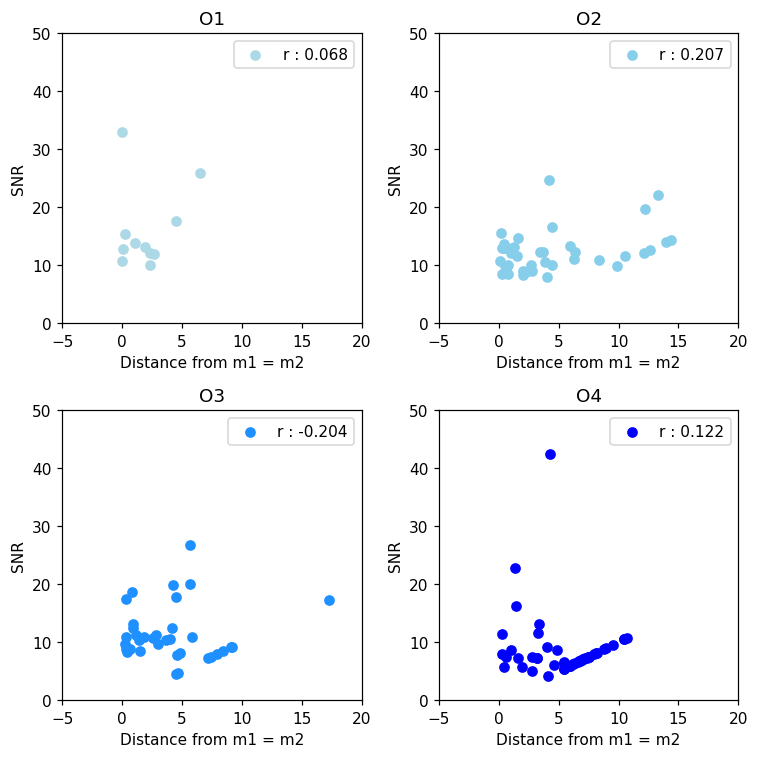

In [55]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7), dpi=110)

datasets = [distances_O1, distances_O2, distances_O3, distances_O4]

dataset_labels = ["O1", "O2", "O3", "O4"]

colors = ["lightblue", "skyblue", "dodgerblue", "blue"]

left_index = [0,0,1,1]
right_index = [0,1,0,1]

for dataset, dataset_label, color, li, ri in zip(datasets, dataset_labels, colors, left_index, right_index):

    ax[li, ri].scatter(dataset["min_distance"], dataset["snr"], color=color, label=dataset_label)

    r_val = SCC(dataset, "min_distance", "snr")
    
    ax[li, ri].legend([f'r : {r_val:.3f}'])
    
    ax[li, ri].set_xlim(-5, 20)
    ax[li, ri].set_ylim(0, 50)

    ax[li, ri].set_xlabel("Distance from m1 = m2")
    ax[li, ri].set_ylabel("SNR")

    ax[li, ri].set_title(dataset_label)
    
plt.tight_layout()
plt.show()

What I Expected : that as the distances increased, the SNR would decrease. 

These plots are not at all what I expected ... talk to group about this. Maybe have someone check my method for computing distance and organizing the dataframe?

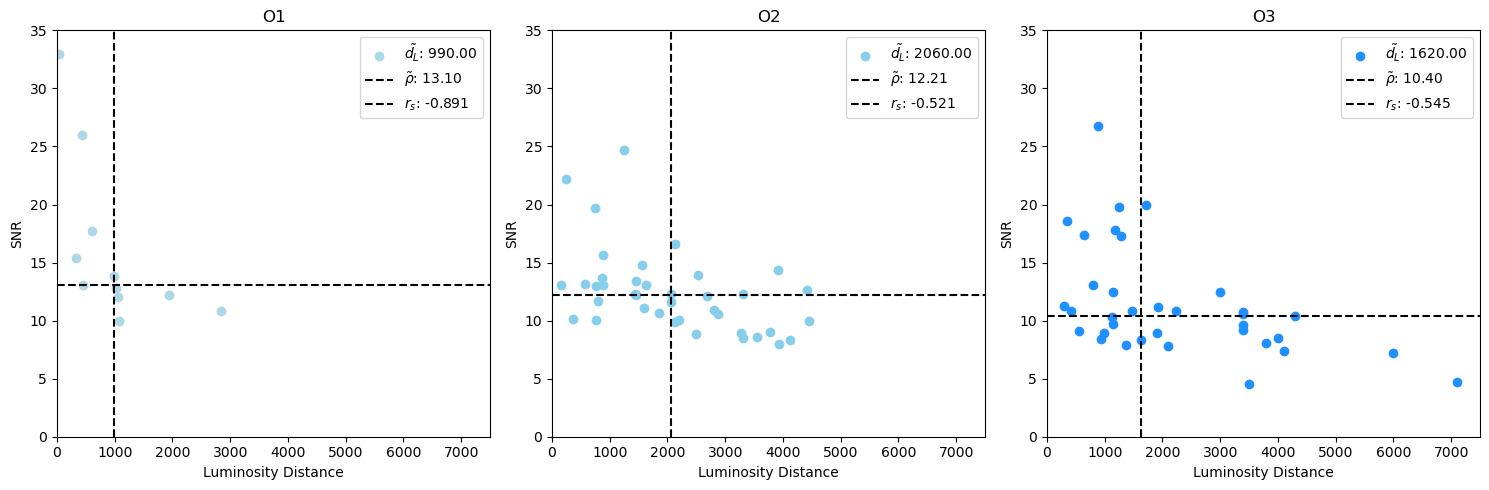

In [56]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

datasets = [O1_all, O2_all, O3_all]

dataset_labels = ["O1", "O2", "O3"]

colors = ["lightblue", "skyblue", "dodgerblue"]

right_index = [0,1,2]

for dataset, dataset_label, color, ri in zip(datasets, dataset_labels, colors, right_index):

    ax[ri].scatter(dataset["luminosity_distance"], dataset["network_matched_filter_snr"], color=color, label=dataset_label)

    median_luminosity_distance = np.median(dataset["luminosity_distance"])
    median_snr = np.median(dataset["network_matched_filter_snr"])

    ax[ri].axvline(median_luminosity_distance, color="black", linestyle="--")
    ax[ri].axhline(median_snr, color="black", linestyle="--")

    r_val = SCC(dataset, "luminosity_distance", "network_matched_filter_snr")
    
    ax[ri].legend([f'$\\tilde{{d_L}}$: {median_luminosity_distance:.2f}', f'$\\tilde{{\\rho}}$: {median_snr:.2f}', f'$r_s$: {r_val:.3f}'])

    # remember that these limits were manually set
    ax[ri].set_xlim(0, 7500)
    ax[ri].set_ylim(0, 35)
    
    ax[ri].set_xlabel("Luminosity Distance")
    ax[ri].set_ylabel("SNR")

    ax[ri].set_title(dataset_label)

plt.tight_layout()

plt.show()


These results are currently not meaningful... I need to normalize the data by mass in the d(m1 = m2) plot...


... Do I, though? I don't think this would change anything ...

If I were to normalize by mass, the distances would remain the same. I still have a problem because I'm trying to infer a relationship between d(m1 = m2) and SNR but the higher mass events just naturally have higher SNR to begin with. How do I get rid of this contribution? 

EDIT: I have shown above that increased chirp mass does NOT result in an increased SNR... there seems to be a "desired" SNR range that the detector identify events at (around 10)/there is a natural SNR value that real gravitational waves seem to have (the more likely...)

What if I try a 3D plot: SNR, d(m1 = m2), Mtot? 

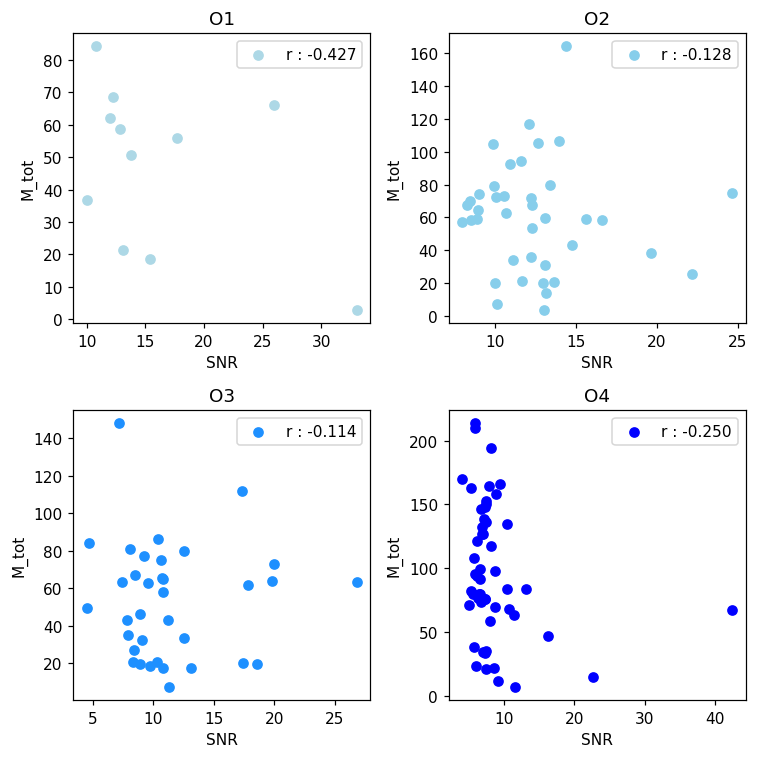

In [57]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7), dpi=110)

datasets = [O1_all, O2_all, O3_all, O4_all]

dataset_labels = ["O1", "O2", "O3", "O4"]

colors = ["lightblue", "skyblue", "dodgerblue", "blue"]

left_index = [0,0,1,1]
right_index = [0,1,0,1]

for dataset, dataset_label, color, li, ri in zip(datasets, dataset_labels, colors, left_index, right_index):
    
    # Defining Mtot for every dataset
    dataset["M_tot"] = dataset["mass_1_source"] + dataset["mass_2_source"]
    
    ax[li, ri].scatter(dataset["network_matched_filter_snr"], dataset["M_tot"], color=color, label=dataset_label)

    r_val = SCC(dataset, "network_matched_filter_snr", "M_tot")
    
    ax[li, ri].legend([f'r : {r_val:.3f}'])
    
    #ax[li, ri].set_xlim(-5, 20)
    #ax[li, ri].set_ylim(0, 50)

    ax[li, ri].set_xlabel("SNR")
    ax[li, ri].set_ylabel("M_tot")

    ax[li, ri].set_title(dataset_label)
    
plt.tight_layout()
plt.show()

In [58]:
distances_O1["mass_1"] = O1_all["mass_1_source"]
distances_O2["mass_1"] = O2_all["mass_1_source"]
distances_O3["mass_1"] = O3_all["mass_1_source"]
distances_O4["mass_1"] = O4_all["mass_1_source"]

distances_O1["mass_2"] = O1_all["mass_2_source"]
distances_O2["mass_2"] = O2_all["mass_2_source"]
distances_O3["mass_2"] = O3_all["mass_2_source"]
distances_O4["mass_2"] = O4_all["mass_2_source"]

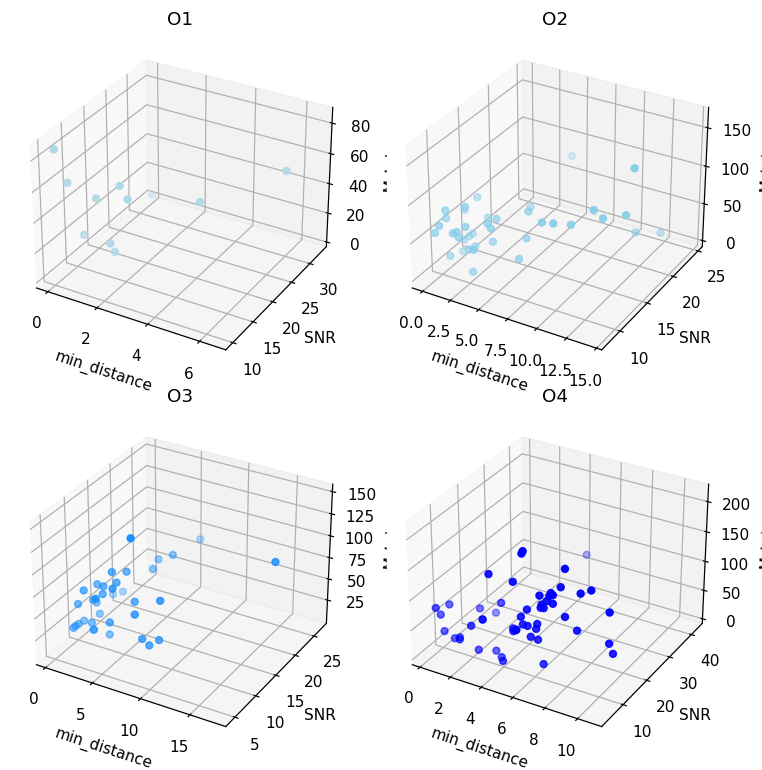

In [59]:
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(2, 2, figsize=(7, 7), dpi=110, subplot_kw={'projection': '3d'})

datasets = [distances_O1, distances_O2, distances_O3, distances_O4]

dataset_labels = ["O1", "O2", "O3", "O4"]

colors = ["lightblue", "skyblue", "dodgerblue", "blue"]

left_index = [0,0,1,1]
right_index = [0,1,0,1]

for dataset, dataset_label, color, li, ri in zip(datasets, dataset_labels, colors, left_index, right_index):
    
    # Defining Mtot for every dataset
    dataset["M_tot"] = dataset["mass_1"] + dataset["mass_2"]
    
    ax[li, ri].scatter(dataset["min_distance"], dataset["snr"], dataset["M_tot"], color=color, label=dataset_label)

    ax[li, ri].set_xlabel("min_distance")
    ax[li, ri].set_ylabel("SNR")
    ax[li, ri].set_zlabel("M_tot")

    ax[li, ri].set_title(dataset_label)
    
plt.tight_layout()
plt.show()

Ask the group for help on this... how can I display a relationship between d(m1 = m2) and snr that also accounts for the total mass of the system? 

In [60]:
mass_diffrence_over_sum_O1 = pd.DataFrame()
mass_diffrence_over_sum_O2 = pd.DataFrame()
mass_diffrence_over_sum_O3 = pd.DataFrame()
mass_diffrence_over_sum_O4 = pd.DataFrame()
df_list = [O1_all, O2_all, O3_all, O4_all]
distances_list = [mass_diffrence_over_sum_O1, mass_diffrence_over_sum_O2, mass_diffrence_over_sum_O3, mass_diffrence_over_sum_O4]
df_names = ["O1", "O2", "O3", "O4"]

for df, distances in zip(df_list, distances_list):
    for row_index in range(len(df)):
        row = df.iloc[row_index]
        scatter_point = row[["mass_1_source", "mass_2_source"]].values


        value = abs(scatter_point[0] - scatter_point[1]) / (scatter_point[0] + scatter_point[1])
        distances.loc[row_index, 'diffrence'] = value


        distances.loc[row_index, "snr"] = row["network_matched_filter_snr"]

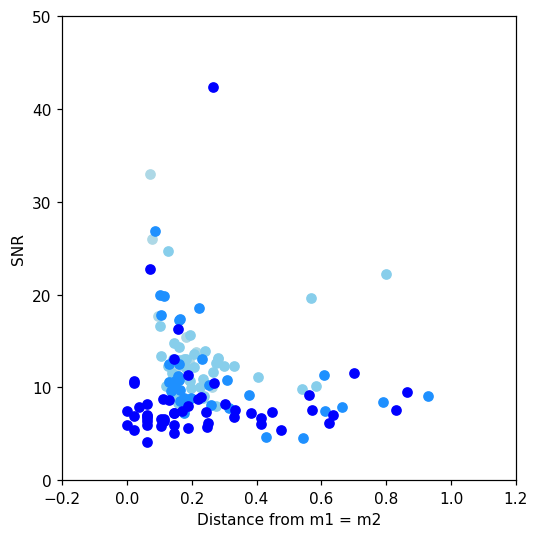

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi = 110)

datasets = [mass_diffrence_over_sum_O1, mass_diffrence_over_sum_O2, mass_diffrence_over_sum_O3, mass_diffrence_over_sum_O4]

dataset_labels = ["O1", "O2", "O3", "O4"]

colors = ["lightblue", "skyblue", "dodgerblue", "blue"]

for dataset, dataset_label, color in zip(datasets, dataset_labels, colors):
    ax.scatter(dataset["diffrence"], dataset["snr"], color=color, label=dataset_label)

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(0, 50)

ax.set_xlabel("Distance from m1 = m2")
ax.set_ylabel("SNR")

plt.tight_layout()
plt.show()

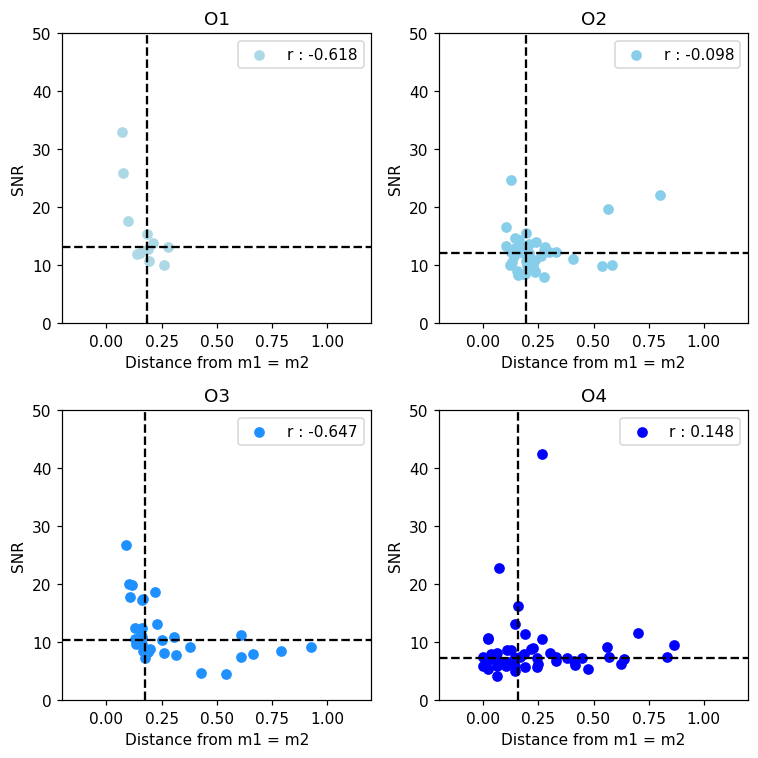

In [62]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7), dpi=110)

datasets = [mass_diffrence_over_sum_O1, mass_diffrence_over_sum_O2, mass_diffrence_over_sum_O3, mass_diffrence_over_sum_O4]

dataset_labels = ["O1", "O2", "O3", "O4"]

colors = ["lightblue", "skyblue", "dodgerblue", "blue"]

left_index = [0,0,1,1]
right_index = [0,1,0,1]

for dataset, dataset_label, color, li, ri in zip(datasets, dataset_labels, colors, left_index, right_index):

    ax[li, ri].scatter(dataset["diffrence"], dataset["snr"], color=color, label=dataset_label)

    r_val = SCC(dataset, "diffrence", "snr")
   
    ax[li, ri].legend([f'r : {r_val:.3f}'])
   
    median_diffrence = np.median(dataset["diffrence"])
    median_snr = np.median(dataset["snr"])

    ax[li, ri].axvline(median_diffrence, color="black", linestyle="--")
    ax[li, ri].axhline(median_snr, color="black", linestyle="--")

    ax[li, ri].set_xlim(-0.2, 1.2)
    ax[li, ri].set_ylim(0, 50)

    ax[li, ri].set_xlabel("Distance from m1 = m2")
    ax[li, ri].set_ylabel("SNR")

    ax[li, ri].set_title(dataset_label)
   
plt.tight_layout()
plt.show()

This graph shows the relationship of d(m1 = m2) to SNR. Datapoints are scaled to a value between 1 and 0 (however, not via normalization), but the method used is diffrent then that used originally. d(m1 = m2) is calculated by diffrence over sum, i.e.,

$$\frac{|m_1 - m_2|}{m_1 + m_2}$$

In [64]:
def calculate_slope(x, y, min_y):
    y_reduced = y - min_y
    
    x = x[:,np.newaxis]
    a, _, _, _ = np.linalg.lstsq(x, y_reduced, rcond=None)
    
    return a[0]

<Axes: xlabel='M_tot', ylabel='Count'>

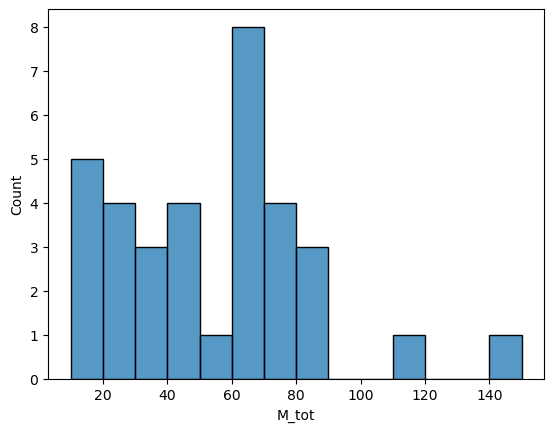

In [91]:
sns.histplot(O3_all["M_tot"], binwidth=10, binrange=[10, 150])

C:\Users\lucas\AppData\Local\Temp\ipykernel_12248\3115505985.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]


Text(0.5, 1.0, 'O3 : SNR vs Inverse Luminosity Distance')

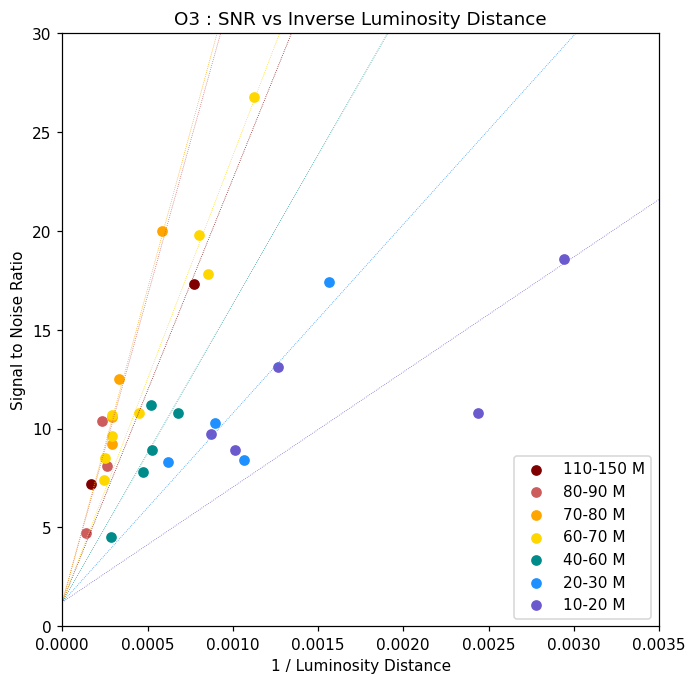

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [110, 80, 70, 60, 40, 20, 10]
bin_highs = [150, 90, 80, 70, 60, 30, 20]
colors = ["maroon", "indianred", "orange", "gold", "darkcyan", "dodgerblue", "slateblue"]
intercepts = list()

for low, high in zip(bin_lows, bin_highs):
    values = O3_all[O3_all["M_tot"] >= low]
    values = values[values["M_tot"] <= high]
    _, b = np.polyfit(1 / values["luminosity_distance"], values["network_matched_filter_snr"], 1)
    intercepts.append(b)

y_intercept = np.median(intercepts)

for low, high, color in zip(bin_lows, bin_highs, colors):
    values = O3_all[O3_all["M_tot"] >= low]
    values = values[values["M_tot"] <= high]
    a = calculate_slope(1 / values["luminosity_distance"], values["network_matched_filter_snr"], y_intercept)

    ax.scatter(1 / values["luminosity_distance"], values["network_matched_filter_snr"], color=color, label=f"{low}-{high} M")

    line_values = np.array([0, 1])
    
    ax.plot(line_values, a * line_values + y_intercept, color=color, linestyle=":", linewidth=0.5)

ax.legend()

ax.set_xlabel("1 / Luminosity Distance")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 0.0035)
ax.set_ylim(0, 30)

ax.set_title("O3 : SNR vs Inverse Luminosity Distance")

<Axes: xlabel='M_tot', ylabel='Count'>

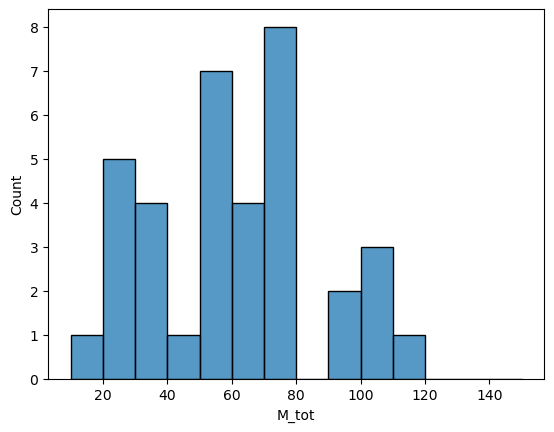

In [71]:
sns.histplot(O2_all["M_tot"], binwidth=10, binrange=[10, 150])

C:\Users\lucas\AppData\Local\Temp\ipykernel_12248\3115505985.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]


Text(0.5, 1.0, 'O2 : SNR vs Inverse Luminosity Distance')

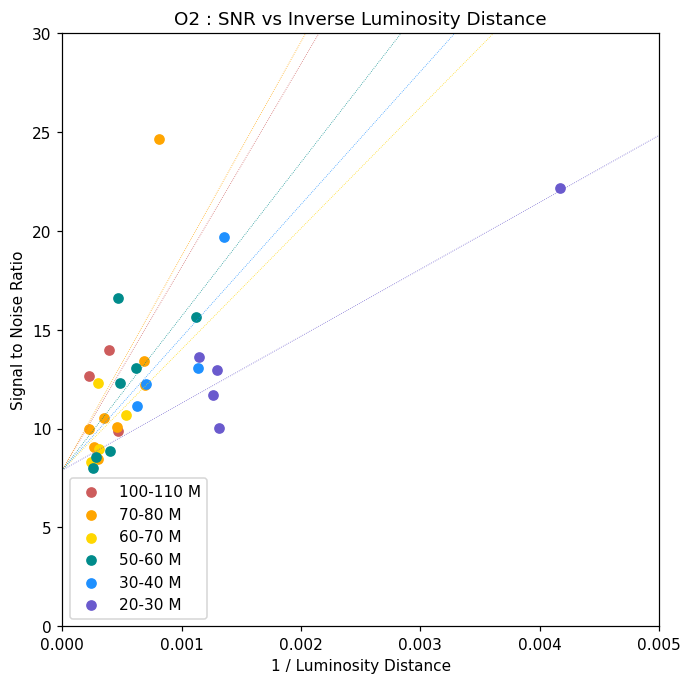

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [100, 70, 60, 50, 30, 20]
bin_highs = [110, 80, 70, 60, 40, 30]
colors = ["indianred", "orange", "gold", "darkcyan", "dodgerblue", "slateblue"]
intercepts = list()

for low, high in zip(bin_lows, bin_highs):
    values = O2_all[O2_all["M_tot"] >= low]
    values = values[values["M_tot"] <= high]
    _, b = np.polyfit(1 / values["luminosity_distance"], values["network_matched_filter_snr"], 1)
    intercepts.append(b)

y_intercept = np.mean(intercepts)

for low, high, color in zip(bin_lows, bin_highs, colors):
    values = O2_all[O2_all["M_tot"] >= low]
    values = values[values["M_tot"] <= high]
    a = calculate_slope(1 / values["luminosity_distance"], values["network_matched_filter_snr"], y_intercept)

    ax.scatter(1 / values["luminosity_distance"], values["network_matched_filter_snr"], color=color, label=f"{low}-{high} M")

    line_values = np.array([0, 1])
    
    ax.plot(line_values, a * line_values + y_intercept, color=color, linestyle=":", linewidth=0.5)

ax.legend()

ax.set_xlabel("1 / Luminosity Distance")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 0.005)
ax.set_ylim(0, 30)

ax.set_title("O2 : SNR vs Inverse Luminosity Distance")

<Axes: xlabel='M_tot', ylabel='Count'>

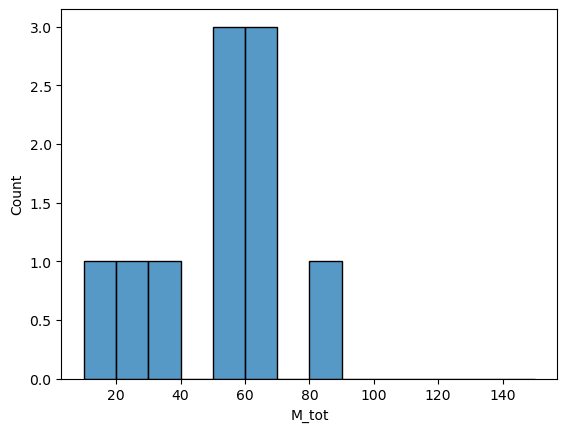

In [77]:
sns.histplot(O1_all["M_tot"], binwidth=10, binrange=[10, 150])

c:\Users\lucas\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\lucas\AppData\Local\Temp\ipykernel_12248\3115505985.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]


Text(0.5, 1.0, 'O1 : SNR vs Inverse Luminosity Distance')

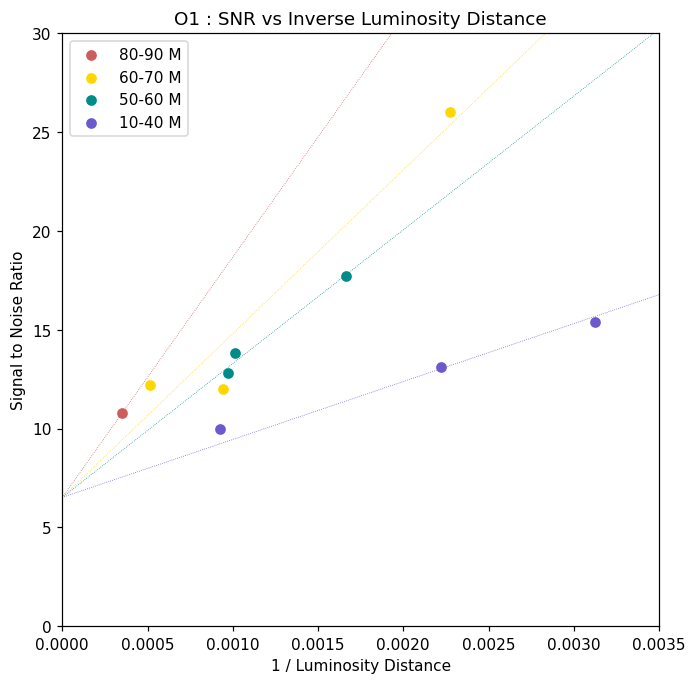

In [119]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7), dpi=110)

# setting bins
bin_lows = [80, 60, 50, 10]
bin_highs = [90, 70, 60, 40]
colors = ["indianred", "gold", "darkcyan", "slateblue"]
intercepts = list()

for low, high in zip(bin_lows, bin_highs):
    values = O1_all[O1_all["M_tot"] >= low]
    values = values[values["M_tot"] <= high]
    _, b = np.polyfit(1 / values["luminosity_distance"], values["network_matched_filter_snr"], 1)
    intercepts.append(b)

y_intercept = np.mean(intercepts)

for low, high, color in zip(bin_lows, bin_highs, colors):
    values = O1_all[O1_all["M_tot"] >= low]
    values = values[values["M_tot"] <= high]
    a = calculate_slope(1 / values["luminosity_distance"], values["network_matched_filter_snr"], y_intercept)

    ax.scatter(1 / values["luminosity_distance"], values["network_matched_filter_snr"], color=color, label=f"{low}-{high} M")

    line_values = np.array([0, 1])
    
    ax.plot(line_values, a * line_values + y_intercept, color=color, linestyle=":", linewidth=0.5)

ax.legend()

ax.set_xlabel("1 / Luminosity Distance")
ax.set_ylabel("Signal to Noise Ratio")

ax.set_xlim(0, 0.0035)
ax.set_ylim(0, 30)

ax.set_title("O1 : SNR vs Inverse Luminosity Distance")